<a href="https://colab.research.google.com/github/neklyud/pytorch-tutorial/blob/master/exeperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()
      self.fc1 = torch.nn.Linear(in_features = 1, out_features = 90)
      self.acc1 = torch.nn.Tanh()
      self.fc2 = torch.nn.Linear(in_features = 90, out_features = 90)
      self.acc2 = torch.nn.Tanh()
      self.fc3 = torch.nn.Linear(in_features = 90, out_features = 90)
      self.acc3 = torch.nn.Tanh()
      self.fc4 = torch.nn.Linear(in_features = 90, out_features = 1)
      
    def forward(self, x):
      x = self.fc1(x)
      x = self.acc1(x)
      x = self.fc2(x)
      x = self.acc2(x)
      x = self.fc3(x)
      x = self.acc3(x)
      x = self.fc4(x)
      return x

net = RegressionNet(100)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
print(x_train[:5])
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred-target)**2
    return squares.mean()

for epoch_index in range(4650):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

print(metric(net.forward(x_validation), y_validation).item())

tensor([[-10.0000],
        [ -9.8485],
        [ -9.6970],
        [ -9.5455],
        [ -9.3939]])
0.02299864962697029


In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

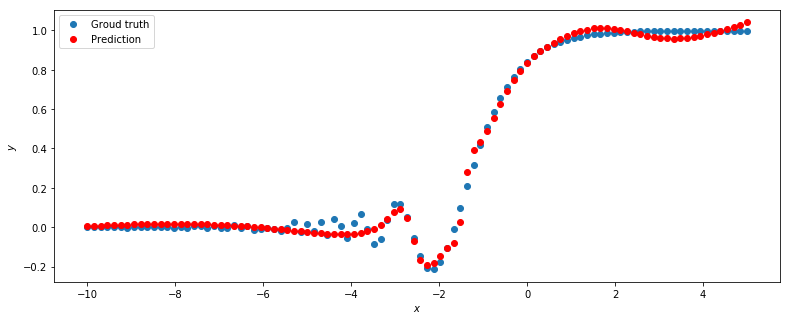

In [54]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)

In [0]:
metrics = []

In [0]:
net1 = RegressionNet(100)
optimizer = torch.optim.Adam(net1.parameters(), lr=0.001)
for epoch_index in range(4650):
    optimizer.zero_grad()
    y_pred = net1.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

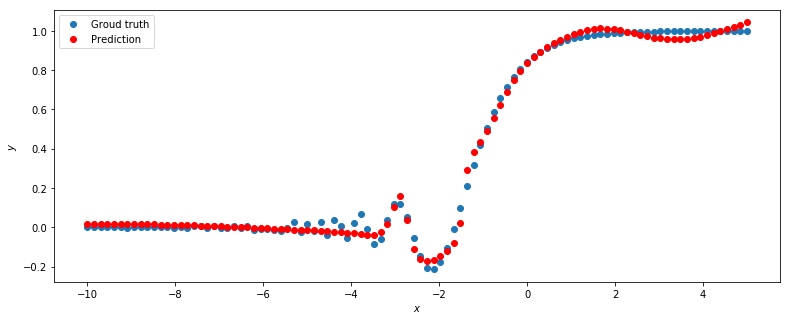

In [84]:
predict(net1, x_validation, y_validation)
metric_y = metric(net1.forward(x_validation), y_validation).item()
metrics.append(metric_y)

In [0]:
net2 = RegressionNet(200)
optimizer = torch.optim.Adam(net2.parameters(), lr=0.001)
for epoch_index in range(4650):
    optimizer.zero_grad()

    y_pred = net2.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

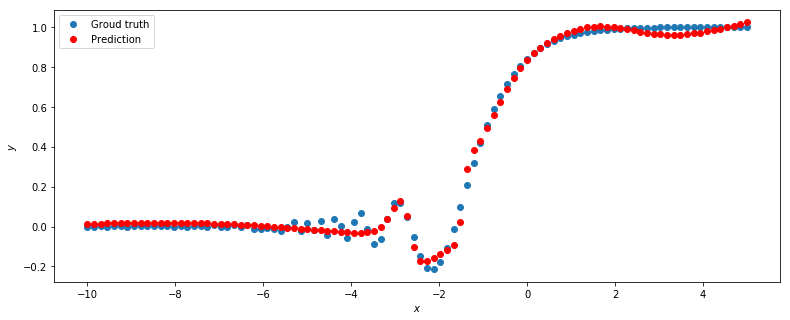

In [86]:
predict(net2, x_validation, y_validation)
metric_y = metric(net2.forward(x_validation), y_validation).item()
metrics.append(metric_y)

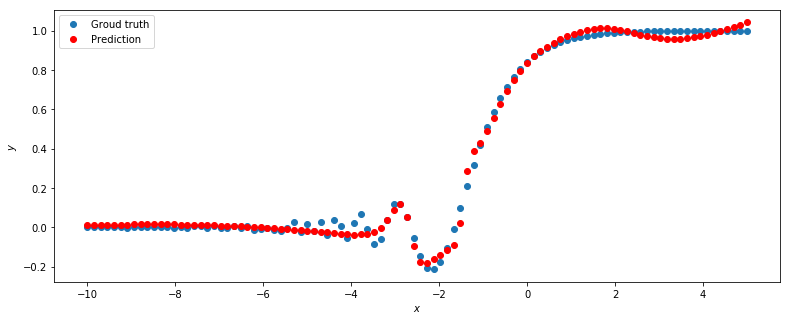

In [87]:
net3 = RegressionNet(300)
optimizer = torch.optim.Adam(net3.parameters(), lr=0.001)
for epoch_index in range(4650):
    optimizer.zero_grad()
    y_pred = net3.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
predict(net3, x_validation, y_validation)
metric_y = metric(net3.forward(x_validation), y_validation).item()
metrics.append(metric_y)

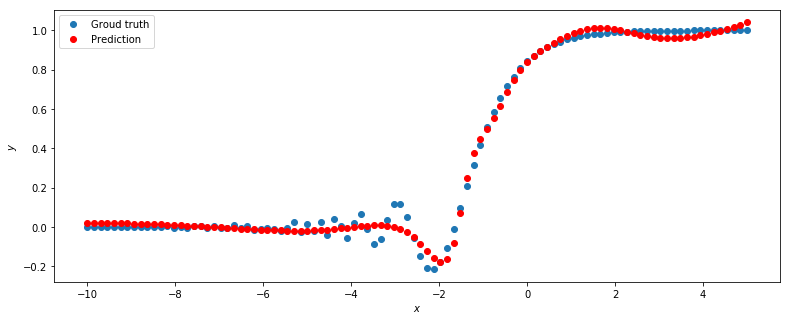

In [88]:
net4 = RegressionNet(400)
optimizer = torch.optim.Adam(net4.parameters(), lr=0.001)
for epoch_index in range(4650):
    optimizer.zero_grad()
    y_pred = net4.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
predict(net4, x_validation, y_validation)
metric_y = metric(net4.forward(x_validation), y_validation).item()
metrics.append(metric_y)

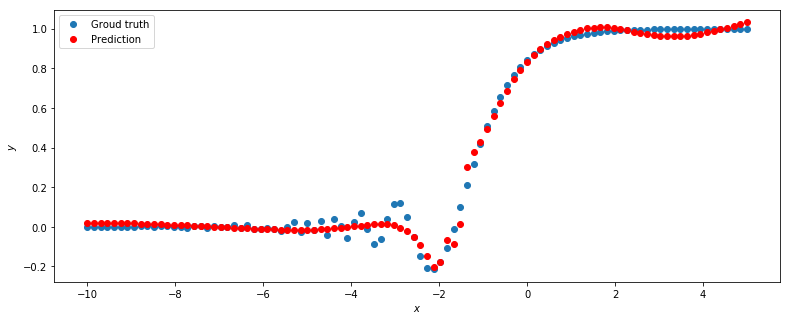

In [89]:
net5 = RegressionNet(500)
optimizer = torch.optim.Adam(net5.parameters(), lr=0.001)
for epoch_index in range(4650):
    optimizer.zero_grad()
    y_pred = net5.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
predict(net5, x_validation, y_validation)
metric_y = metric(net5.forward(x_validation), y_validation).item()
metrics.append(metric_y)

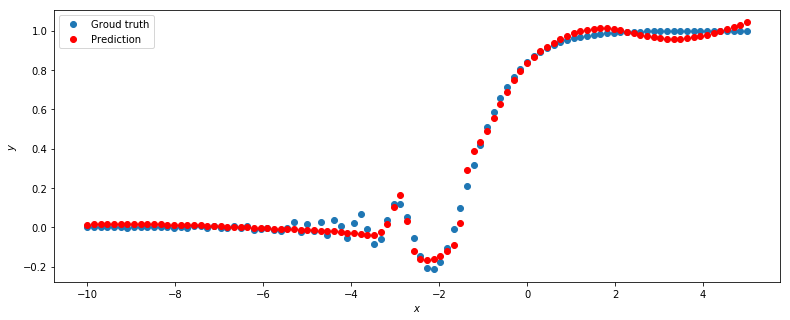

In [90]:
net6 = RegressionNet(600)
optimizer = torch.optim.Adam(net6.parameters(), lr=0.001)
for epoch_index in range(4650):
    optimizer.zero_grad()
    y_pred = net6.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
predict(net6, x_validation, y_validation)
metric_y = metric(net6.forward(x_validation), y_validation).item()
metrics.append(metric_y)

In [91]:
metrics

[0.023141996935009956,
 0.02334119752049446,
 0.023190123960375786,
 0.025662433356046677,
 0.02473727986216545,
 0.023439746350049973]

Text(0, 0.5, '$y$')

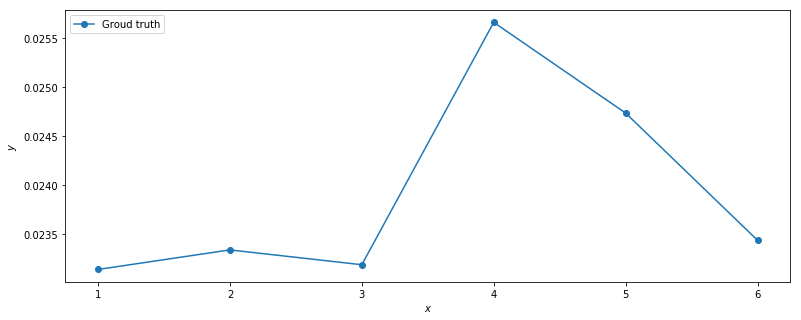

In [94]:

n = [1,2,3,4,5,6]
plt.plot(n, metrics, '-o', label='Groud truth')
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')